# Import basic library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
import re
from urllib.parse import urlsplit
from collections import deque

In [4]:
from requests_html import HTMLSession

## Inisilise dataframe

In [77]:
 data = pd.DataFrame()

## Working url

In [78]:
url = 'https://www.flipkart.com/mens-footwear/sports-shoes/pr?sid=osp,cil,1cu&otracker=nmenu_sub_Men_0_Sports%20Shoes'

In [7]:
req= requests.get(url)

In [8]:
content=BeautifulSoup(req.content,'html.parser')

## Geting company name

In [79]:
name = content.find_all('div' , {"class":"_2WkVRV"})

In [80]:
name_main = []
for i in name:
    name_main.append(i.text)

In [81]:
name_data = pd.DataFrame(name_main)

In [82]:
name_data.head(5)

,0
0,TR
1,Kraasa
2,World Wear Footwear
3,BIRDE
4,HOTSTYLE


In [83]:
data["name"] =name_data

In [84]:
data.head(5)

,name
0,TR
1,Kraasa
2,World Wear Footwear
3,BIRDE
4,HOTSTYLE


## Geting price

In [91]:
price = content.find_all('div' , {"class":"_30jeq3"})

In [92]:
price_main = []
for i in price:
    price_main.append(i.text)

In [93]:
price_data = pd.DataFrame(price_main)

In [94]:
price_data.head(5)

,0
0,₹399
1,₹532
2,₹249
3,₹299
4,₹258


In [95]:
data["price"] = price_data

In [90]:
data.head(5)

,name,price
0,TR,₹399
1,Kraasa,₹532
2,World Wear Footwear,₹249
3,BIRDE,₹299
4,HOTSTYLE,₹258


## Geting original price

In [96]:
original_price = content.find_all('div' , {"class":"_3I9_wc"})

In [97]:
original_price_main = []
for i in original_price:
    original_price_main.append(i.text)

In [98]:
original_price_data = pd.DataFrame(original_price_main)

In [99]:
data["original_price"] = original_price_data

In [100]:
data.head(5)

,name,price,original_price
0,TR,₹399,"₹1,499"
1,Kraasa,₹532,"₹1,999"
2,World Wear Footwear,₹249,₹998
3,BIRDE,₹299,₹999
4,HOTSTYLE,₹258,₹499


## Discount

In [133]:
discount = content.find_all('div' , {"class":"_3Ay6Sb"})

In [134]:
discount_main = []
for i in discount:
    discount_main.append(i.text)

In [135]:
discount_data = pd.DataFrame(discount_main)

In [136]:
discount_data.head(5)

,0
0,73% off
1,73% off
2,75% off
3,70% off
4,48% off


In [137]:
data["discount"] = discount_data

In [138]:
data.head(5)

,name,price,original_price,discount
0,TR,₹399,"₹1,499",73% off
1,Kraasa,₹532,"₹1,999",73% off
2,World Wear Footwear,₹249,₹998,75% off
3,BIRDE,₹299,₹999,70% off
4,HOTSTYLE,₹258,₹499,48% off


## Now fetching email address

In [139]:
unscraped = deque([url])
scraped = set()
emails = set()  

In [140]:
while len(unscraped):
    urls = unscraped.popleft()  
    scraped.add(urls)

In [141]:
parts = urlsplit(urls)

In [142]:
base_url = "{0.scheme}://{0.netloc}".format(parts)
if '/' in parts.path:
  path = urls[:urls.rfind('/')+1]
else:
  path = urls

In [143]:
response = requests.get(url)

In [144]:
new_emails = set(re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.com", response.text, re.I))
emails.update(new_emails) 

In [145]:
soup = BeautifulSoup(response.text, 'lxml')

In [146]:
 for anchor in soup.find_all("a"): 
        
        # extract linked url from the anchor
        if "href" in anchor.attrs:
          link = anchor.attrs["href"]
        else:
          link = ''
        
        # resolve relative links (starting with /)
        if link.startswith('/'):
            link = base_url + link
            
        elif not link.startswith('http'):
            link = path + link

In [147]:
if not link.endswith(".gz"):
    if not link in unscraped and not link in scraped:
        unscraped.append(link)

In [148]:
df = pd.DataFrame(emails, columns=["Email"]) 

In [149]:
df

,Email
0,b2fe488e344a47eda53b8d306edec9b7@sentry.flipka...


In [150]:
data.describe()

,name,price,original_price,discount
count,40,40,40,40
unique,19,32,14,26
top,ASIAN,₹299,₹999,70% off
freq,8,4,13,3


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            40 non-null     object
 1   price           40 non-null     object
 2   original_price  40 non-null     object
 3   discount        40 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


In [152]:
def convert(x):
    value = x[1:]
    l = value.split(',')
    s= ''
    for i in l:
        s=s+i
    
    return (float(s))
    

In [153]:
data1  = data.copy()
data1['price'] = data1['price'].apply(convert)
data1.head(5)

,name,price,original_price,discount
0,TR,399.0,"₹1,499",73% off
1,Kraasa,532.0,"₹1,999",73% off
2,World Wear Footwear,249.0,₹998,75% off
3,BIRDE,299.0,₹999,70% off
4,HOTSTYLE,258.0,₹499,48% off


In [154]:
data1.dropna()

,name,price,original_price,discount
0,TR,399.0,"₹1,499",73% off
1,Kraasa,532.0,"₹1,999",73% off
2,World Wear Footwear,249.0,₹998,75% off
3,BIRDE,299.0,₹999,70% off
4,HOTSTYLE,258.0,₹499,48% off
5,World Wear Footwear,297.0,₹998,70% off
6,ASIAN,498.0,₹699,28% off
7,DXMODA,699.0,₹999,30% off
8,World Wear Footwear,299.0,₹999,70% off
9,BRUTON,299.0,"₹1,299",76% off


In [155]:
data2  = data1.copy()
data2['original_price'] = data2['original_price'].apply(convert)
data2.head(5)

,name,price,original_price,discount
0,TR,399.0,1499.0,73% off
1,Kraasa,532.0,1999.0,73% off
2,World Wear Footwear,249.0,998.0,75% off
3,BIRDE,299.0,999.0,70% off
4,HOTSTYLE,258.0,499.0,48% off


In [156]:
data1.head(5)

,name,price,original_price,discount
0,TR,399.0,"₹1,499",73% off
1,Kraasa,532.0,"₹1,999",73% off
2,World Wear Footwear,249.0,₹998,75% off
3,BIRDE,299.0,₹999,70% off
4,HOTSTYLE,258.0,₹499,48% off


In [157]:
def convert_discount(x):
    l = x.split('%')
    return (float(l[0]))
    

In [158]:
data3  = data2.copy()
data3['discount'] = data3['discount'].apply(convert_discount)
data3.head(5)

,name,price,original_price,discount
0,TR,399.0,1499.0,73.0
1,Kraasa,532.0,1999.0,73.0
2,World Wear Footwear,249.0,998.0,75.0
3,BIRDE,299.0,999.0,70.0
4,HOTSTYLE,258.0,499.0,48.0


In [130]:
data1.head(5)

,name,price,original_price
0,TR,399.0,"₹1,499"
1,Kraasa,532.0,"₹1,999"
2,World Wear Footwear,249.0,₹998
3,BIRDE,299.0,₹999
4,HOTSTYLE,258.0,₹499


## Now some visualisation

In [159]:
company_name = data3.groupby('name')['name'].agg('count')
company_name = pd.DataFrame(company_name)
company_name

,name
name,
AIRDRON,3
ASIAN,8
BERSACHE,1
BIRDE,2
BRUTON,2
CAMPUS,3
DXMODA,1
Furo,1
Furo by Red Chief,1


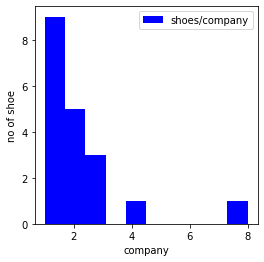

In [160]:
matplotlib.rcParams['figure.figsize']=(4,4)
plt.hist(company_name ,color='blue',label='shoes/company')

plt.xlabel("company")
plt.ylabel("no of shoe")

plt.legend()

In [161]:
company_name = data3.groupby('name')['discount'].agg('max')
company_name = pd.DataFrame(company_name)
company_name

,discount
name,
AIRDRON,55.0
ASIAN,53.0
BERSACHE,46.0
BIRDE,71.0
BRUTON,76.0
CAMPUS,37.0
DXMODA,30.0
Furo,20.0
Furo by Red Chief,52.0


In [162]:
company_name = data3.groupby('name')['discount'].agg('mean')
company_name = pd.DataFrame(company_name)
company_name

,discount
name,
AIRDRON,54.000000
ASIAN,35.125000
BERSACHE,46.000000
BIRDE,70.500000
BRUTON,76.000000
CAMPUS,29.666667
DXMODA,30.000000
Furo,20.000000
Furo by Red Chief,52.000000


## Export both data frame in single csv file

In [166]:
pd.concat([
    pd.concat([data3, df], axis=1),
    pd.concat([data3, df], axis=1)]).to_csv('shoe_data.csv',index=False)
